In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

import missingno as msno    # 누락값 표시
import warnings
import mglearn
warnings.filterwarnings('ignore')  # 워닝 무시
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)

0.972027972027972

## 데이터 전처리와 매개변수 선택

In [5]:
# 잘못된 코드의 예시
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
grid.cv_results_

{'mean_fit_time': array([0.01037264, 0.00917602, 0.00737982, 0.00798421, 0.00838394,
        0.00817623, 0.00757837, 0.00737357, 0.00757494, 0.00718017,
        0.00798435, 0.01196861, 0.00878396, 0.00778031, 0.00857577,
        0.00496907, 0.00877662, 0.01157064, 0.00817676, 0.00719438,
        0.00419559, 0.00319061, 0.00955062, 0.01236668, 0.00776386,
        0.00418997, 0.00260601, 0.0037837 , 0.01036425, 0.01258116,
        0.00398598, 0.00299306, 0.00278964, 0.00378952, 0.01436152,
        0.01217389]),
 'std_fit_time': array([1.19614819e-03, 1.32410314e-03, 1.01752328e-03, 6.32192700e-04,
        7.85502571e-04, 7.56811380e-04, 1.00931714e-03, 1.01597867e-03,
        4.85250766e-04, 7.46562110e-04, 6.54943056e-04, 1.11269339e-03,
        1.82083818e-03, 7.26103397e-04, 1.86372454e-03, 1.90701482e-05,
        1.32477943e-03, 1.35414626e-03, 9.76521642e-04, 9.75264358e-04,
        1.17027921e-03, 7.55652040e-04, 1.18434246e-03, 8.18285222e-04,
        1.18666681e-03, 7.36990556e-0

## 파이프라인 구축하기

In [6]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.972027972027972

## 그리드 서치에 파이프라인 적용하기

In [7]:
# 어느 단계의 매개변수인지 같이 입력한다.

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_                

{'svm__C': 1, 'svm__gamma': 1}

## 파이프라인 인터페이스

In [8]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(), SVC(C=100))
param_grid = {'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_score_

0.9812311901504789

In [13]:
# 단계 속성에 접근하기
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
pipe.fit(cancer.data)

# 'pca' 단계의 두 개 주성분을 추출한다.
components = pipe.named_steps['pca'].components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [17]:
# 그리드 서치 안의 파이프라인 속성에 접근하기
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid.fit(X_train, y_train)
# 파이프라인의 두 단계 중 LogisticRegression 단계의 최적의 모델 확인하기
grid.best_estimator_.named_steps['logisticregression']
grid.best_estimator_.named_steps['logisticregression'].coef_


array([[-0.43570655, -0.34266946, -0.40809443, -0.5344574 , -0.14971847,
         0.61034122, -0.72634347, -0.78538827,  0.03886087,  0.27497198,
        -1.29780109,  0.04926005, -0.67336941, -0.93447426, -0.13939555,
         0.45032641, -0.13009864, -0.10144273,  0.43432027,  0.71596578,
        -1.09068862, -1.09463976, -0.85183755, -1.06406198, -0.74316099,
         0.07252425, -0.82323903, -0.65321239, -0.64379499, -0.42026013]])

### 전처리와 모델의, 매개변수를 위한 그리드 서치

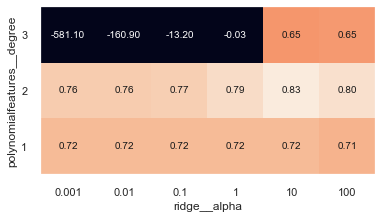

In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

# 각 단계의 매개변수를 한 번에 그리드서치 하기
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# 히트맵으로 나타내기
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                      xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                      xticklabels=param_grid['ridge__alpha'],
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

### 모델 선택을 위한 그리드 서치

In [ ]:
# RandomForestClassifier와 SVC 비교하기
pipe = make_pipeline([()])